# Use matplotlib-venn to draw venn diagrams \*_\*

- Documentation: https://pypi.org/project/matplotlib-venn/
- Reference: https://alstatr.blogspot.com/2013/11/python-venn-diagram.html

In [1]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib import pyplot as plt
import numpy as np
% matplotlib inline

# 1) Directly give counts for each group

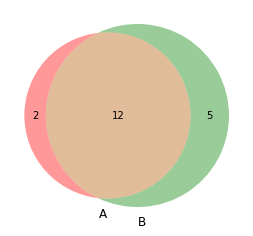

In [2]:
venn2(subsets=(2, 5, 12))  # subsets is counts of (A only, B only, Intersect)
plt.show()

# 2) Give the elements of 2 sets

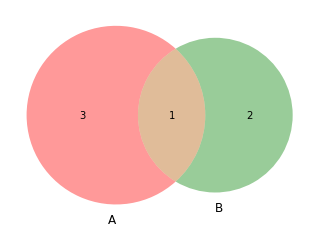

In [3]:
set_A = set(['A', 'B', 'C', 'D'])
set_B = set(['D', 'E', 'F'])

venn2([set_A, set_B])
plt.show()

# Variations
- venn2_circles only draws the outlines
- venn2_unweighted draws the same-sized circles

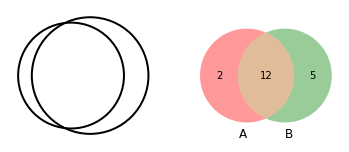

In [4]:
figure, axes = plt.subplots(1, 2)
venn2_circles(subsets=(2, 5, 12), ax=axes[0])
venn2_unweighted(subsets=(2, 5, 12), ax=axes[1])
plt.show()

# Look good
Couldn't find it documented anywhere, but the subset ids need to be: '10' for Left, '01' for Right, and '11' for Intersection

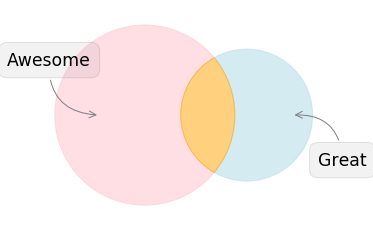

In [5]:
left, right, intersect = ('10', '01', '11')
v = venn2(subsets={left: 34, right: 15, intersect: 7})

# 1. Make it transparent-ish, and remove the count values
for which in (left, right, intersect):
    v.get_patch_by_id(which).set_alpha(0.5)
    v.get_label_by_id(which).set_text('')

# 2. Set colors
v.get_patch_by_id(left).set_color('pink')
v.get_patch_by_id(right).set_color('lightblue')
v.get_patch_by_id(intersect).set_color('orange')

# 3. Remove the labels, and add better ones
for label in ('A', 'B'):
    v.get_label_by_id(label).set_text('')

plt.annotate(
    'Awesome',
    xy=v.get_label_by_id(left).get_position() - np.array([0.1, 0]),
    xytext=(-50, 50),
    size='xx-large',
    ha='center',
    textcoords='offset points',
    bbox={'boxstyle': 'round, pad=0.5', 'fc': 'grey', 'alpha':0.1},
    arrowprops={'arrowstyle': '->', 'connectionstyle': 'arc3, rad = 0.5', 'color': 'gray'}
    )

plt.annotate(
    'Great',
    xy=v.get_label_by_id(right).get_position() - np.array([-0.1, 0]),
    xytext=(50, -50),
    size='xx-large',
    ha='center',
    textcoords='offset points',
    bbox={'boxstyle': 'round, pad=0.5', 'fc': 'grey', 'alpha':0.1},
    arrowprops={'arrowstyle': '->', 'connectionstyle': 'arc3, rad = 0.5', 'color': 'gray'}
    )

plt.show()